In [1]:
# Identifying missing values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("P:\ibm\daily-website-visitors.csv")
missing_data = df.isnull()

In [2]:
missing_data

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2162,False,False,False,False,False,False,False,False
2163,False,False,False,False,False,False,False,False
2164,False,False,False,False,False,False,False,False
2165,False,False,False,False,False,False,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [4]:
# Access data quality
# Check the data types of each column
data_types = df.dtypes
data_types

Row                   int64
Day                  object
Day.Of.Week           int64
Date                 object
Page.Loads           object
Unique.Visits        object
First.Time.Visits    object
Returning.Visits     object
dtype: object

In [5]:
# Generate summary statistics for numerical columns
summary_stats = df.describe()

# Generate summary statistics for categorical columns
categorical_stats = df.describe(include='object')


In [6]:
summary_stats

,Row,Day.Of.Week
count,2167.000000,2167.000000
mean,1084.000000,3.997231
std,625.703338,2.000229
min,1.000000,1.000000
25%,542.500000,2.000000
50%,1084.000000,4.000000
75%,1625.500000,6.000000
max,2167.000000,7.000000


In [7]:
categorical_stats

,Day,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167,2167,2167,2167,2167,2167
unique,7,2167,1756,1658,1587,663
top,Sunday,9/14/2014,"2,948","2,780","3,146",552
freq,310,1,5,5,5,12


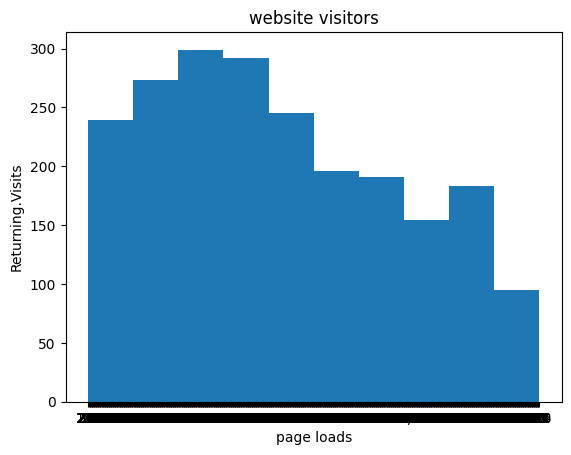

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("P:\ibm\daily-website-visitors.csv")
plt.hist(df['Returning.Visits'], bins=10)

plt.xlabel('page loads')
plt.ylabel('Returning.Visits')
plt.title('website visitors')
plt.show()

 


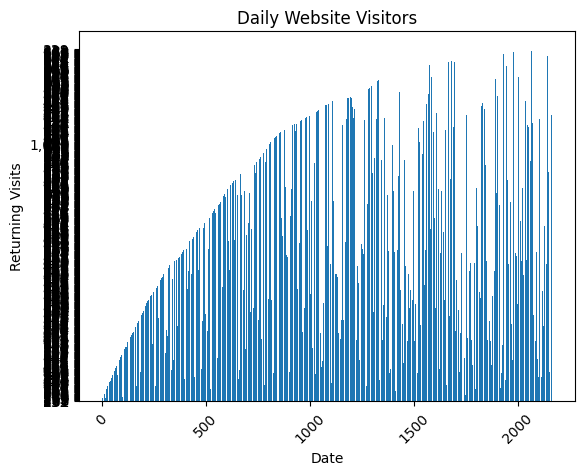

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure to use the correct file path and separator for your CSV file
file_path = ("P:\ibm\daily-website-visitors.csv")
df = pd.read_csv(file_path)

# Create a bar chart
plt.bar(df.index, df['Returning.Visits'], width=0.8)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Returning Visits')
plt.title('Daily Website Visitors')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


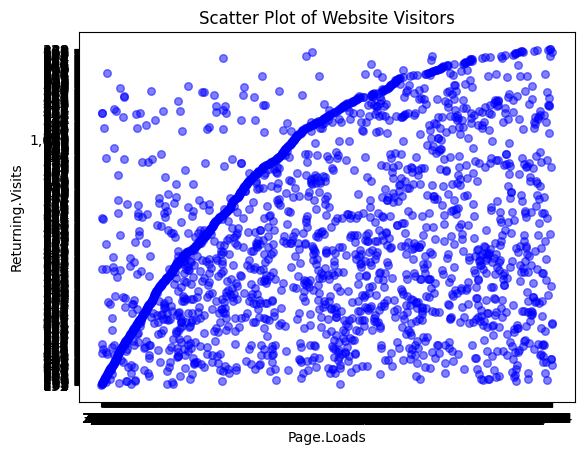

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from your CSV file
file_path = ("P:\ibm\daily-website-visitors.csv")
df = pd.read_csv(file_path)

# Create a scatter plot
plt.scatter(df['Page.Loads'], df['Returning.Visits'], s=30, c='b', marker='o', alpha=0.5)

# Set labels and title
plt.xlabel('Page.Loads')
plt.ylabel('Returning.Visits')
plt.title('Scatter Plot of Website Visitors')

# Show the plot
plt.show()


Mean Squared Error: 4927.8555353089505
R-squared (R2) Score: 0.9929671131858281


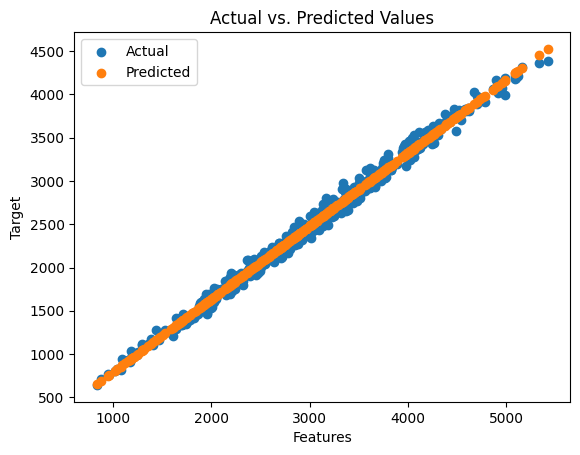

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import re

# Load your CSV dataset
data = pd.read_csv("P:\ibm\daily-website-visitors.csv")

# Preprocess the data to remove commas and convert to float
data['Unique.Visits'] = data['Unique.Visits'].apply(lambda x: float(re.sub(',', '', x)))
data['First.Time.Visits'] = data['First.Time.Visits'].apply(lambda x: float(re.sub(',', '', x)))

# Assuming your dataset has a 'features' column and a 'target' column
X = data[['Unique.Visits']].values
y = data['First.Time.Visits'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

# Plot the actual vs. predicted values
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, label="Predicted")
plt.xlabel("Features")
plt.ylabel("Target")
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.show()
